## Datos de strava

- Filtrar y quedarse solo con Activity.Type="Ride"
- Convertir Activity.Date en un objeto posixct.
- Crear una nueva columna que sea día de la semana
- Crear una nueva columna que sea ida o vuelta al trabajo:
    - Tiene que ser un día de lunes a viernes
    - Ida: Entre las 6 y las 9
    - Vuelta: Entre las 14 y las 19

Para la columna Moving.Time: Calcular tiempo medio de ida, tiempo medio de vuelta, varianza y Boxplot de ambos. 

Ayuda: 
* Para elegir el día de la semana usa la función weekdays del paquete lubridate()
* Para parsear la fecha, usa el siguiente formato: "%b %d, %Y, %I:%M:%S %p"

In [ ]:
Sys.setlocale("LC_ALL","en_EN")

In [1]:
strava = read.csv("data/activities_strava.csv")

In [5]:
head(strava)

,Activity.ID,Activity.Date,Activity.Name,Activity.Type,Activity.Description,Elapsed.Time,Distance,Relative.Effort,Commute,Activity.Gear,⋯,Gear,Precipitation.Probability,Precipitation.Type,Cloud.Cover,Weather.Visibility,UV.Index,Weather.Ozone,translation.missing..en.US.lib.export.portability_exporter.activities.horton_values.jump_count,translation.missing..en.US.lib.export.portability_exporter.activities.horton_values.total_grit,translation.missing..en.US.lib.export.portability_exporter.activities.horton_values.avg_flow
,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<lgl>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2583296920,"Aug 1, 2019, 3:51:15 PM",Afternoon Ride,Ride,NA,50436,8.14,NA,false,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2583296929,"Aug 2, 2019, 5:53:50 AM",Morning Ride,Ride,NA,1745,7.96,NA,false,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2584111125,"Aug 2, 2019, 1:15:49 PM",Afternoon Ride,Ride,NA,944,6.97,NA,false,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2613027582,"Aug 12, 2019, 3:58:59 PM",Afternoon Ride,Ride,NA,4170,10.52,NA,false,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2631611632,"Aug 19, 2019, 5:24:35 AM",Morning Ride,Ride,NA,1744,7.62,NA,true,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2632473031,"Aug 19, 2019, 1:29:48 PM",Afternoon Ride,Ride,NA,1046,7.62,NA,true,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
#?strptime

In [8]:
strava <- strava[strava$Activity.Type=="Ride",]
strava$Activity.Date <- as.POSIXct(strava$Activity.Date, format='%b %d, %Y, %I:%M:%S %p')

In [12]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [19]:
strava$weekday <- factor(weekdays(strava$Activity.Date))

In [21]:
table(strava$weekday)


   Friday    Monday    Sunday  Thursday   Tuesday Wednesday 
       24        11         1        31        20         5 

In [43]:
strava$ida_vuelta <- NA

In [47]:
idx_ida <- (hour(strava$Activity.Date) >= 6 &  hour(strava$Activity.Date) <= 9) & strava$weekday %in% c('Monday','Tuesday','Wednesday','Thursday','Friday')
strava[idx_ida,"ida_vuelta"] <- "Ida"

In [48]:
idx_vuelta <- (hour(strava$Activity.Date) >= 13 &  hour(strava$Activity.Date) <= 19) & !(strava$weekday %in% c('Sunday','Saturday'))
strava$ida_vuelta[idx_vuelta] <- "Vuelta"

In [49]:
table(strava$ida_vuelta)


   Ida Vuelta 
    22     45 

In [50]:
strava$ida_vuelta <- factor(strava$ida_vuelta)

In [51]:
summary(strava[,c("ida_vuelta","weekday","Activity.Date","Moving.Time")])

  ida_vuelta      weekday   Activity.Date                  Moving.Time   
 Ida   :22   Friday   :24   Min.   :2019-08-01 15:51:15   Min.   :  191  
 Vuelta:45   Monday   :11   1st Qu.:2019-09-06 12:00:58   1st Qu.: 1196  
 NA's  :25   Sunday   : 1   Median :2019-10-13 09:30:55   Median : 1539  
             Thursday :31   Mean   :2019-12-16 20:07:05   Mean   : 1965  
             Tuesday  :20   3rd Qu.:2020-02-06 12:57:29   3rd Qu.: 1976  
             Wednesday: 5   Max.   :2020-10-09 13:03:13   Max.   :38641  

Para la columna Moving.Time: Calcular tiempo medio de ida, tiempo medio de vuelta, varianza y Boxplot de ambos. 

In [58]:
mean(strava$Moving.Time[strava$ida_vuelta=='Ida'], na.rm = TRUE)/60

[1] 31.90227

In [59]:
mean(strava$Moving.Time[strava$ida_vuelta=='Vuelta'], na.rm = TRUE)/60

[1] 33.80593

In [61]:
median(strava$Moving.Time[strava$ida_vuelta=='Ida'], na.rm = TRUE)/60

[1] 33.1

In [60]:
median(strava$Moving.Time[strava$ida_vuelta=='Vuelta'], na.rm = TRUE)/60

[1] 20.08333

In [68]:
var(strava$Moving.Time[strava$ida_vuelta=='Ida'], na.rm = TRUE)

[1] 156555.2

In [69]:
var(strava$Moving.Time[strava$ida_vuelta=='Vuelta'], na.rm = TRUE)

[1] 31276509

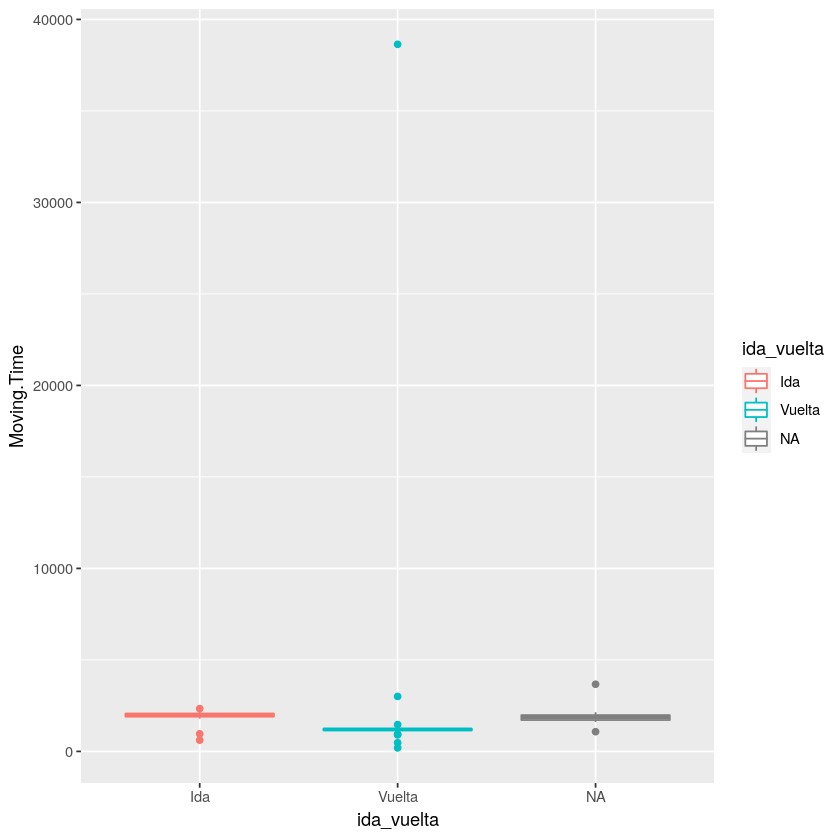

In [71]:
library(ggplot2)
ggplot(strava,aes(y=Moving.Time, x=ida_vuelta))+geom_boxplot(aes(color=ida_vuelta))

In [76]:
colnames(strava)

[1] "Activity.ID"                                                                                   
 [2] "Activity.Date"                                                                                 
 [3] "Activity.Name"                                                                                 
 [4] "Activity.Type"                                                                                 
 [5] "Activity.Description"                                                                          
 [6] "Elapsed.Time"                                                                                  
 [7] "Distance"                                                                                      
 [8] "Relative.Effort"                                                                               
 [9] "Commute"                                                                                       
[10] "Activity.Gear"                                                                                 
[11] "Filename"                                                                                      
[12] "Athlete.Weight"                                                                                
[13] "Bike.Weight"                                                                                   
[14] "Elapsed.Time.1"                                                                                
[15] "Moving.Time"                                                                                   
[16] "Distance.1"                                                                                    
[17] "Max.Speed"                                                                                     
[18] "Average.Speed"                                                                                 
[19] "Elevation.Gain"                                                                                
[20] "Elevation.Loss"                                                                                
[21] "Elevation.Low"                                                                                 
[22] "Elevation.High"                                                                                
[23] "Max.Grade"                                                                                     
[24] "Average.Grade"                                                                                 
[25] "Average.Positive.Grade"                                                                        
[26] "Average.Negative.Grade"                                                                        
[27] "Max.Cadence"                                                                                   
[28] "Average.Cadence"                                                                               
[29] "Max.Heart.Rate"                                                                                
[30] "Average.Heart.Rate"                                                                            
[31] "Max.Watts"                                                                                     
[32] "Average.Watts"                                                                                 
[33] "Calories"                                                                                      
[34] "Max.Temperature"                                                                               
[35] "Average.Temperature"                                                                           
[36] "Relative.Effort.1"                                                                             
[37] "Total.Work"                                                                                    
[38] "Number.of.Runs"                                                                                
[39] "Uphill.Time"                                                                                   
[40] "Downhill.Time"   

In [77]:
strava[strava$Moving.Time>30000,c("ida_vuelta","weekday","Activity.Date","Moving.Time","Elapsed.Time","Distance",'Max.Speed','Average.Speed')]

,ida_vuelta,weekday,Activity.Date,Moving.Time,Elapsed.Time,Distance,Max.Speed,Average.Speed
,<fct>,<fct>,<dttm>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Vuelta,Thursday,2019-08-01 15:51:15,38641,50436,8.14,14.2,NA


In [78]:
strava_clean<-strava[strava$Moving.Time<30000,]

In [80]:
mean(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Vuelta'], na.rm = TRUE)/60

[1] 19.9375

In [81]:
median(strava_clean$Moving.Time[strava_clean$ida_vuelta=='Vuelta'], na.rm = TRUE)/60

[1] 20.06667

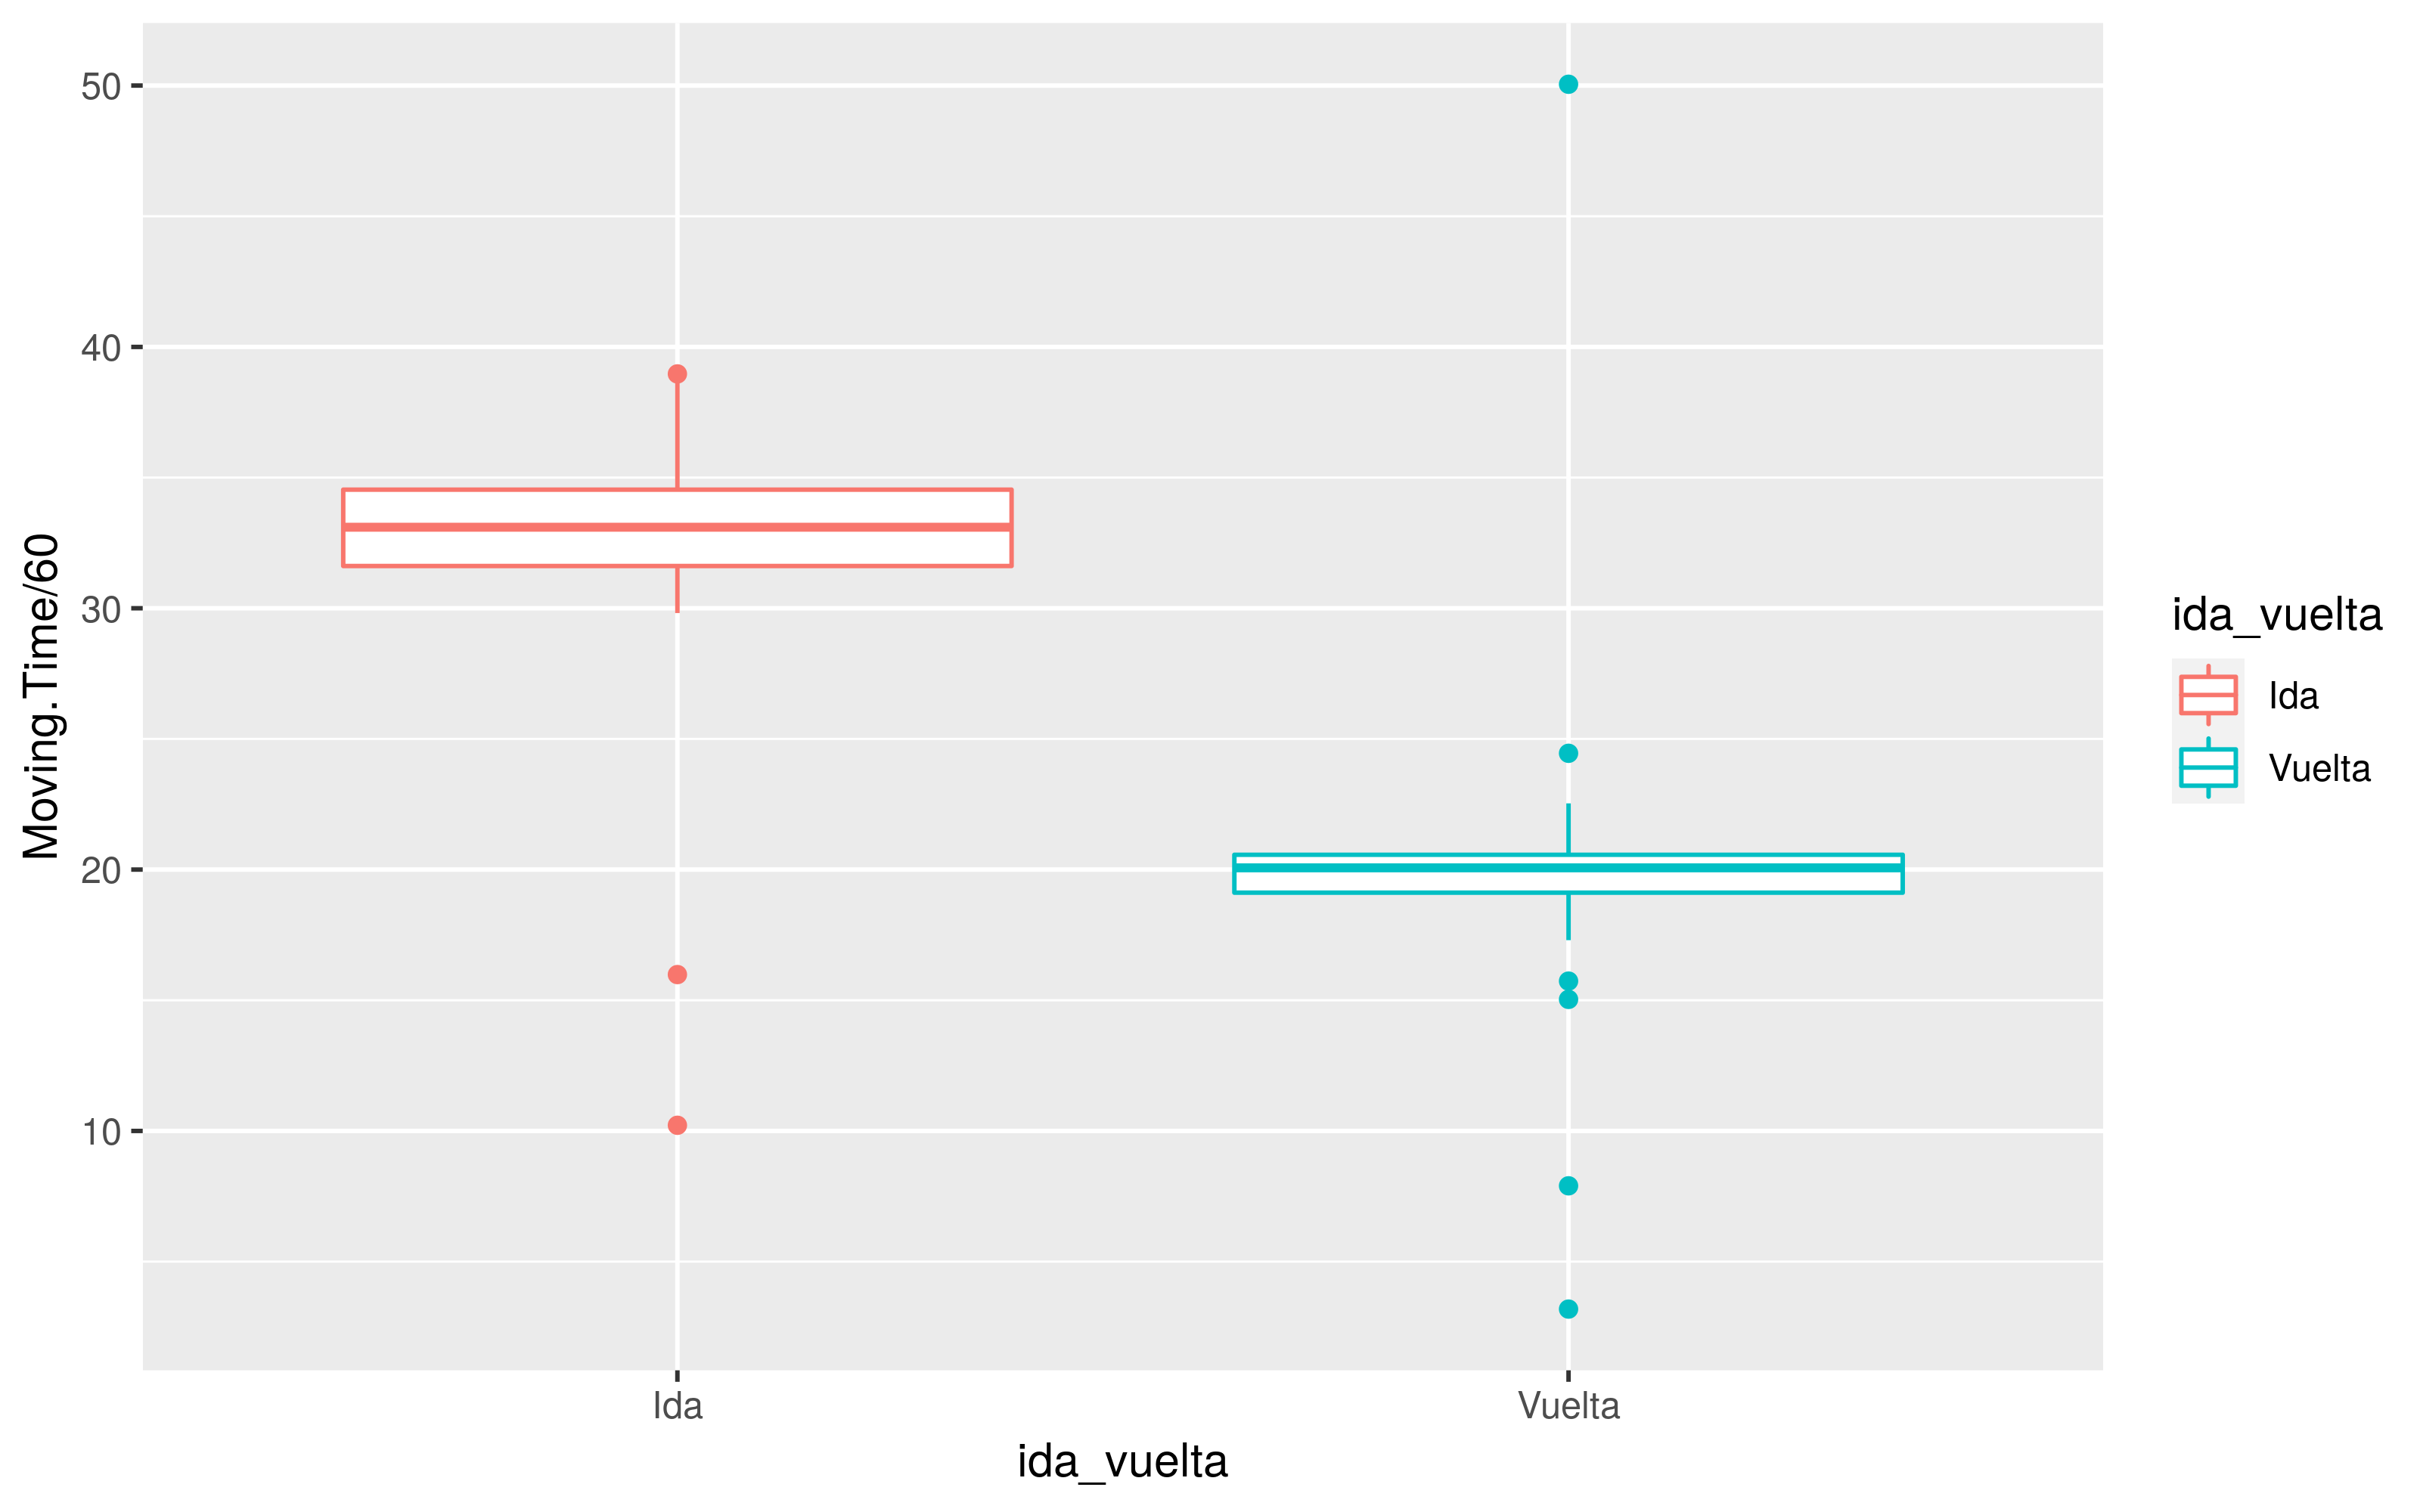

In [89]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)

ggplot(na.omit(strava_clean[,c("Moving.Time","ida_vuelta")]),
       aes(y=Moving.Time/60, x=ida_vuelta,color=ida_vuelta))+geom_boxplot()

In [93]:
quantile(na.omit(strava_clean$Moving.Time[strava_clean$ida_vuelta=="Ida"])/60,c(0.1,0.9))

10%      90% 
29.84667 37.35000

In [94]:
quantile(na.omit(strava_clean$Moving.Time[strava_clean$ida_vuelta=="Vuelta"])/60,c(0.1,0.9))

10%   90% 
17.50 22.18

In [99]:
length(na.omit(strava_clean$Moving.Time[strava_clean$ida_vuelta=="Ida"]))

[1] 44

 ## CSV edad española
 
 Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

Ayuda, función de la media:
\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [100]:
library(dplyr)
library(tidyr)

poblacion_raw<-read.csv("data/9663bsc.csv",skip=0,fileEncoding="ISO-8859-1",header=T, sep=';',stringsAsFactor=F)
poblacion_raw$Total <- as.numeric(gsub('\\.','',poblacion_raw$Total))
poblacion <- poblacion_raw %>% pivot_wider(names_from = Sexo, values_from = Total)  %>% 
 mutate(edad=as.numeric(gsub("año(s|)","",Edad.simple))) %>% drop_na() %>% select(-c(Periodo,Edad.simple)) %>% arrange(edad)

head(poblacion)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Ambos sexos,Hombres,Mujeres,edad
<dbl>,<dbl>,<dbl>,<dbl>
338786,173576,165210,0
363341,186861,176480,1
382059,196311,185748,2
408287,210331,197956,3
431472,221780,209692,4
443170,228110,215060,5


In [115]:
df<-data.frame(a=5,b=7)
df

a,b
<dbl>,<dbl>
5,7


In [116]:
class(df)

[1] "data.frame"

In [114]:
class(poblacion)

[1] "tbl_df"     "tbl"        "data.frame"

In [117]:
poblacion[which.max(unlist(poblacion["Ambos sexos"])),]

Ambos sexos,Hombres,Mujeres,edad
<dbl>,<dbl>,<dbl>,<dbl>
812938,409360,403579,44


In [119]:
paste("La moda es:",poblacion$edad[which.max(unlist(poblacion["Ambos sexos"]))],"años")

[1] "La moda es: 44 años"

In [120]:
poblacion$ratio <- poblacion$`Ambos sexos`/sum(poblacion$`Ambos sexos`)

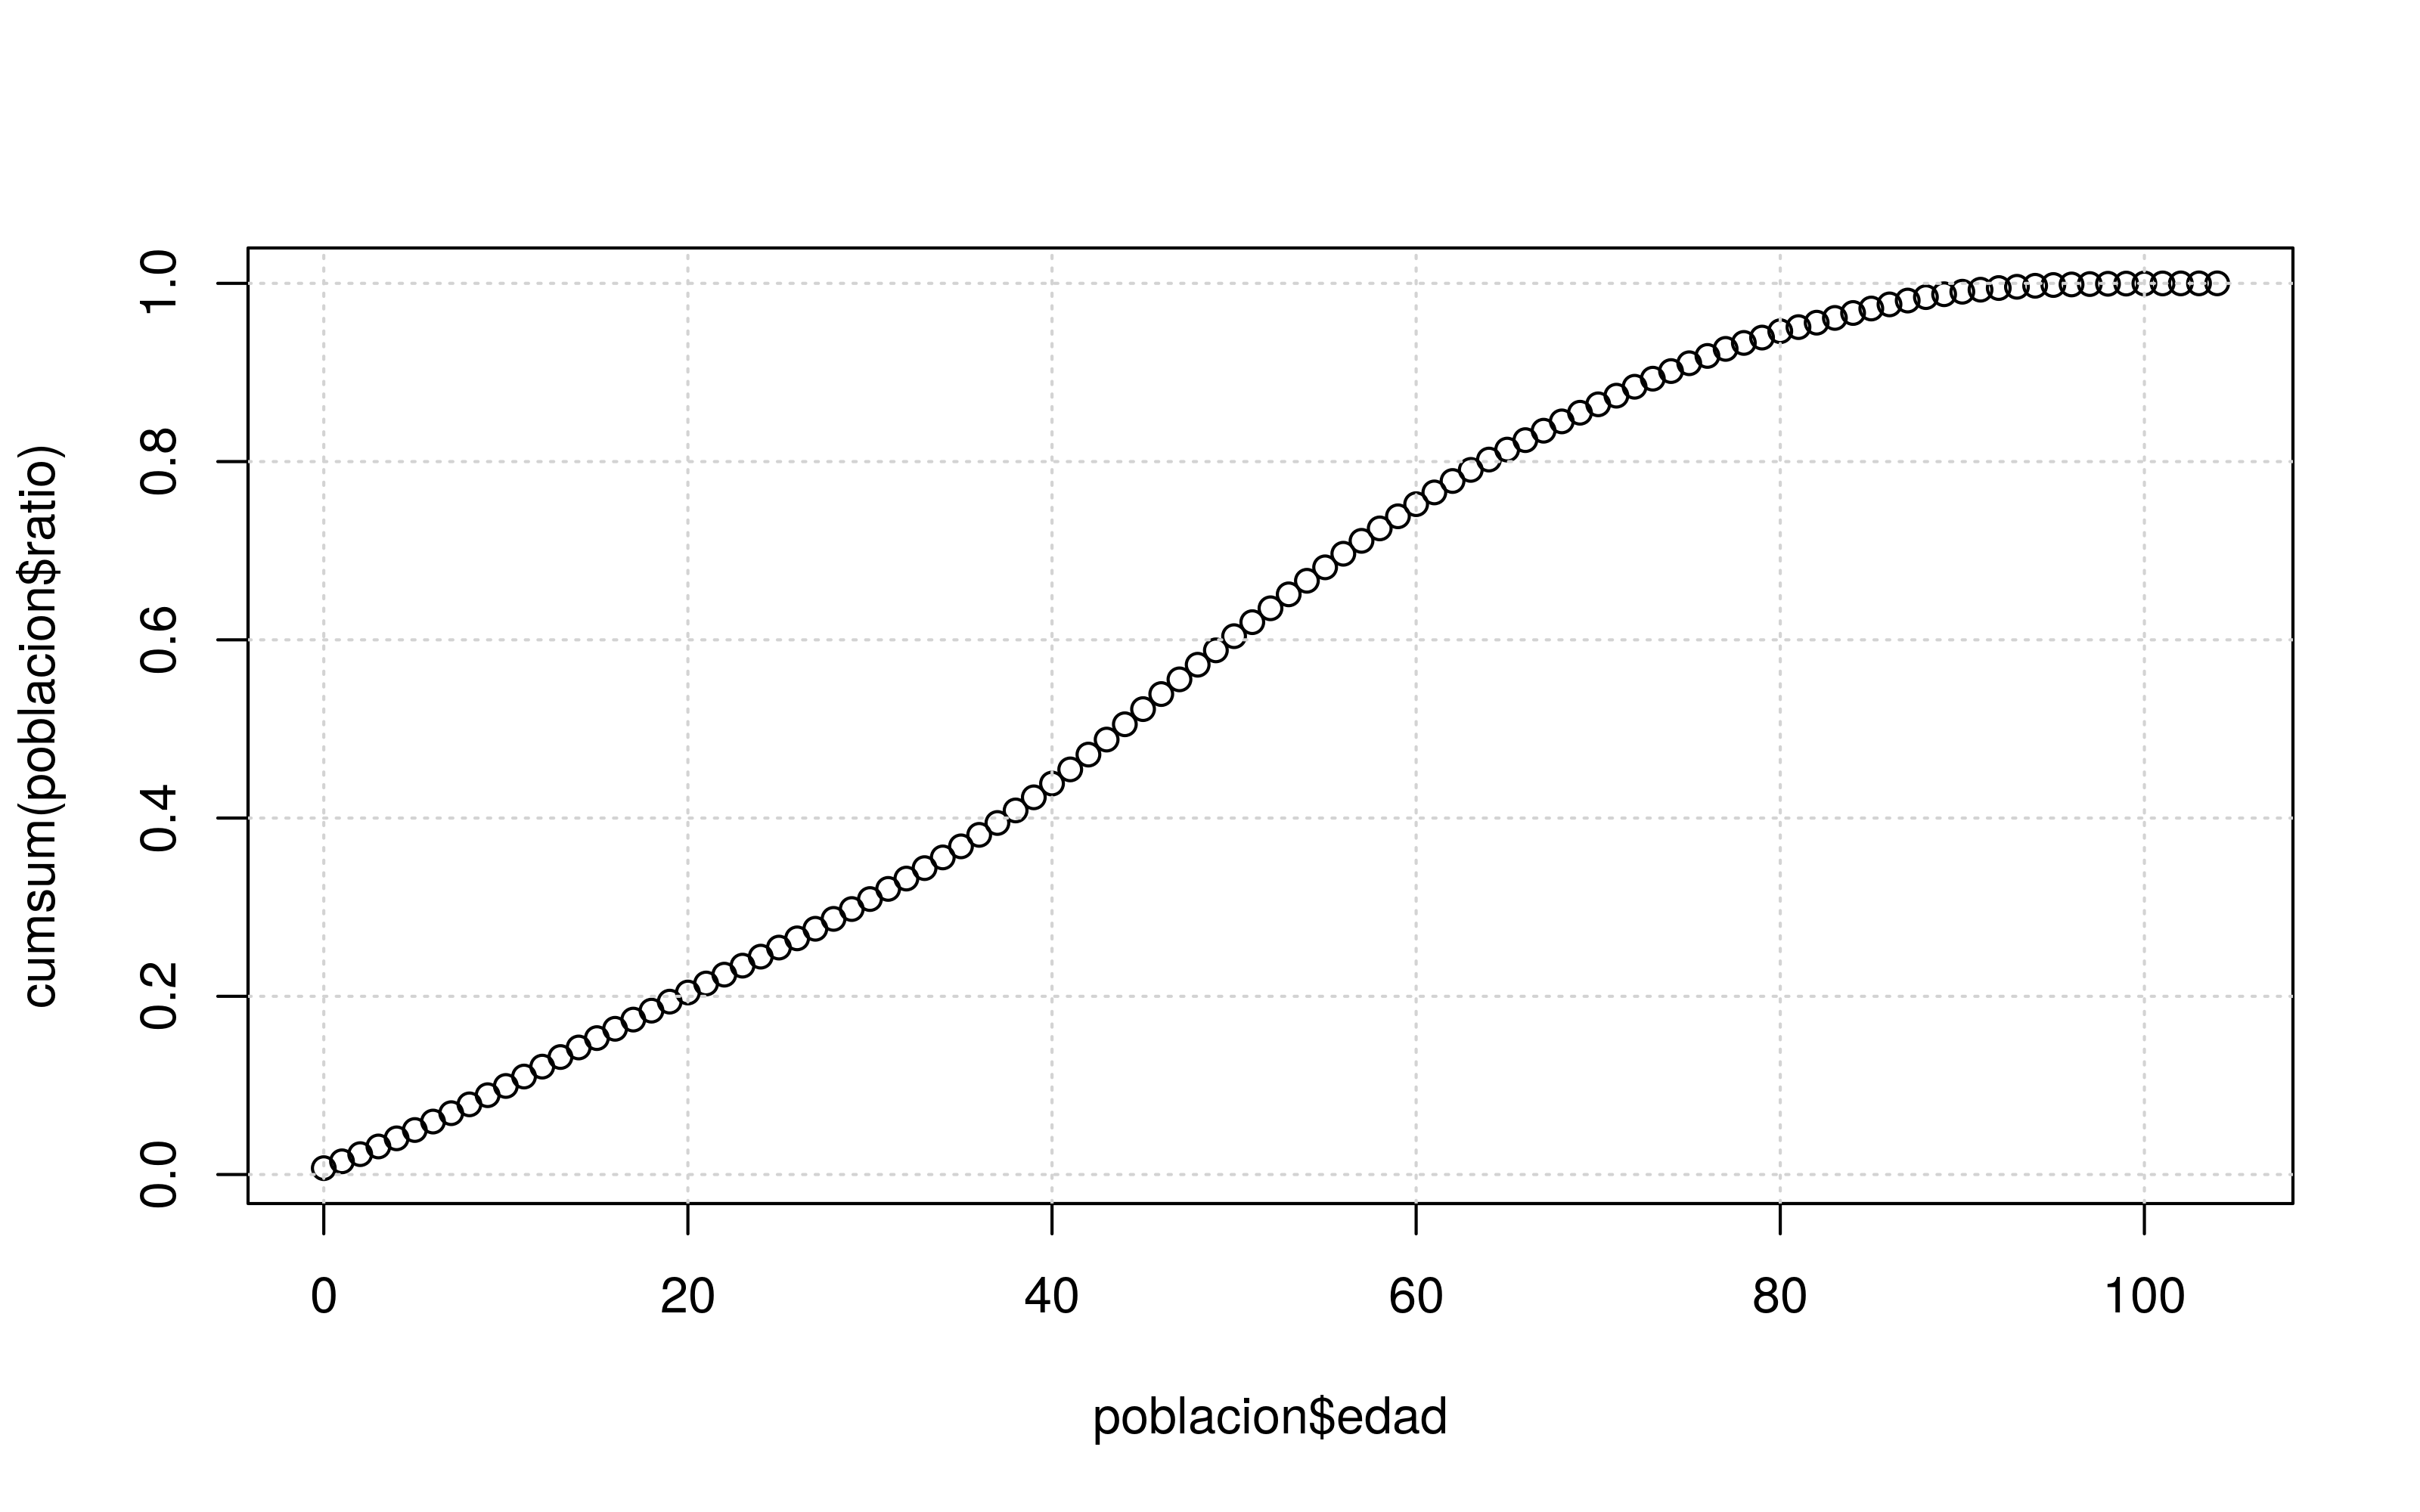

In [128]:
plot(poblacion$edad, cumsum(poblacion$ratio))
grid()

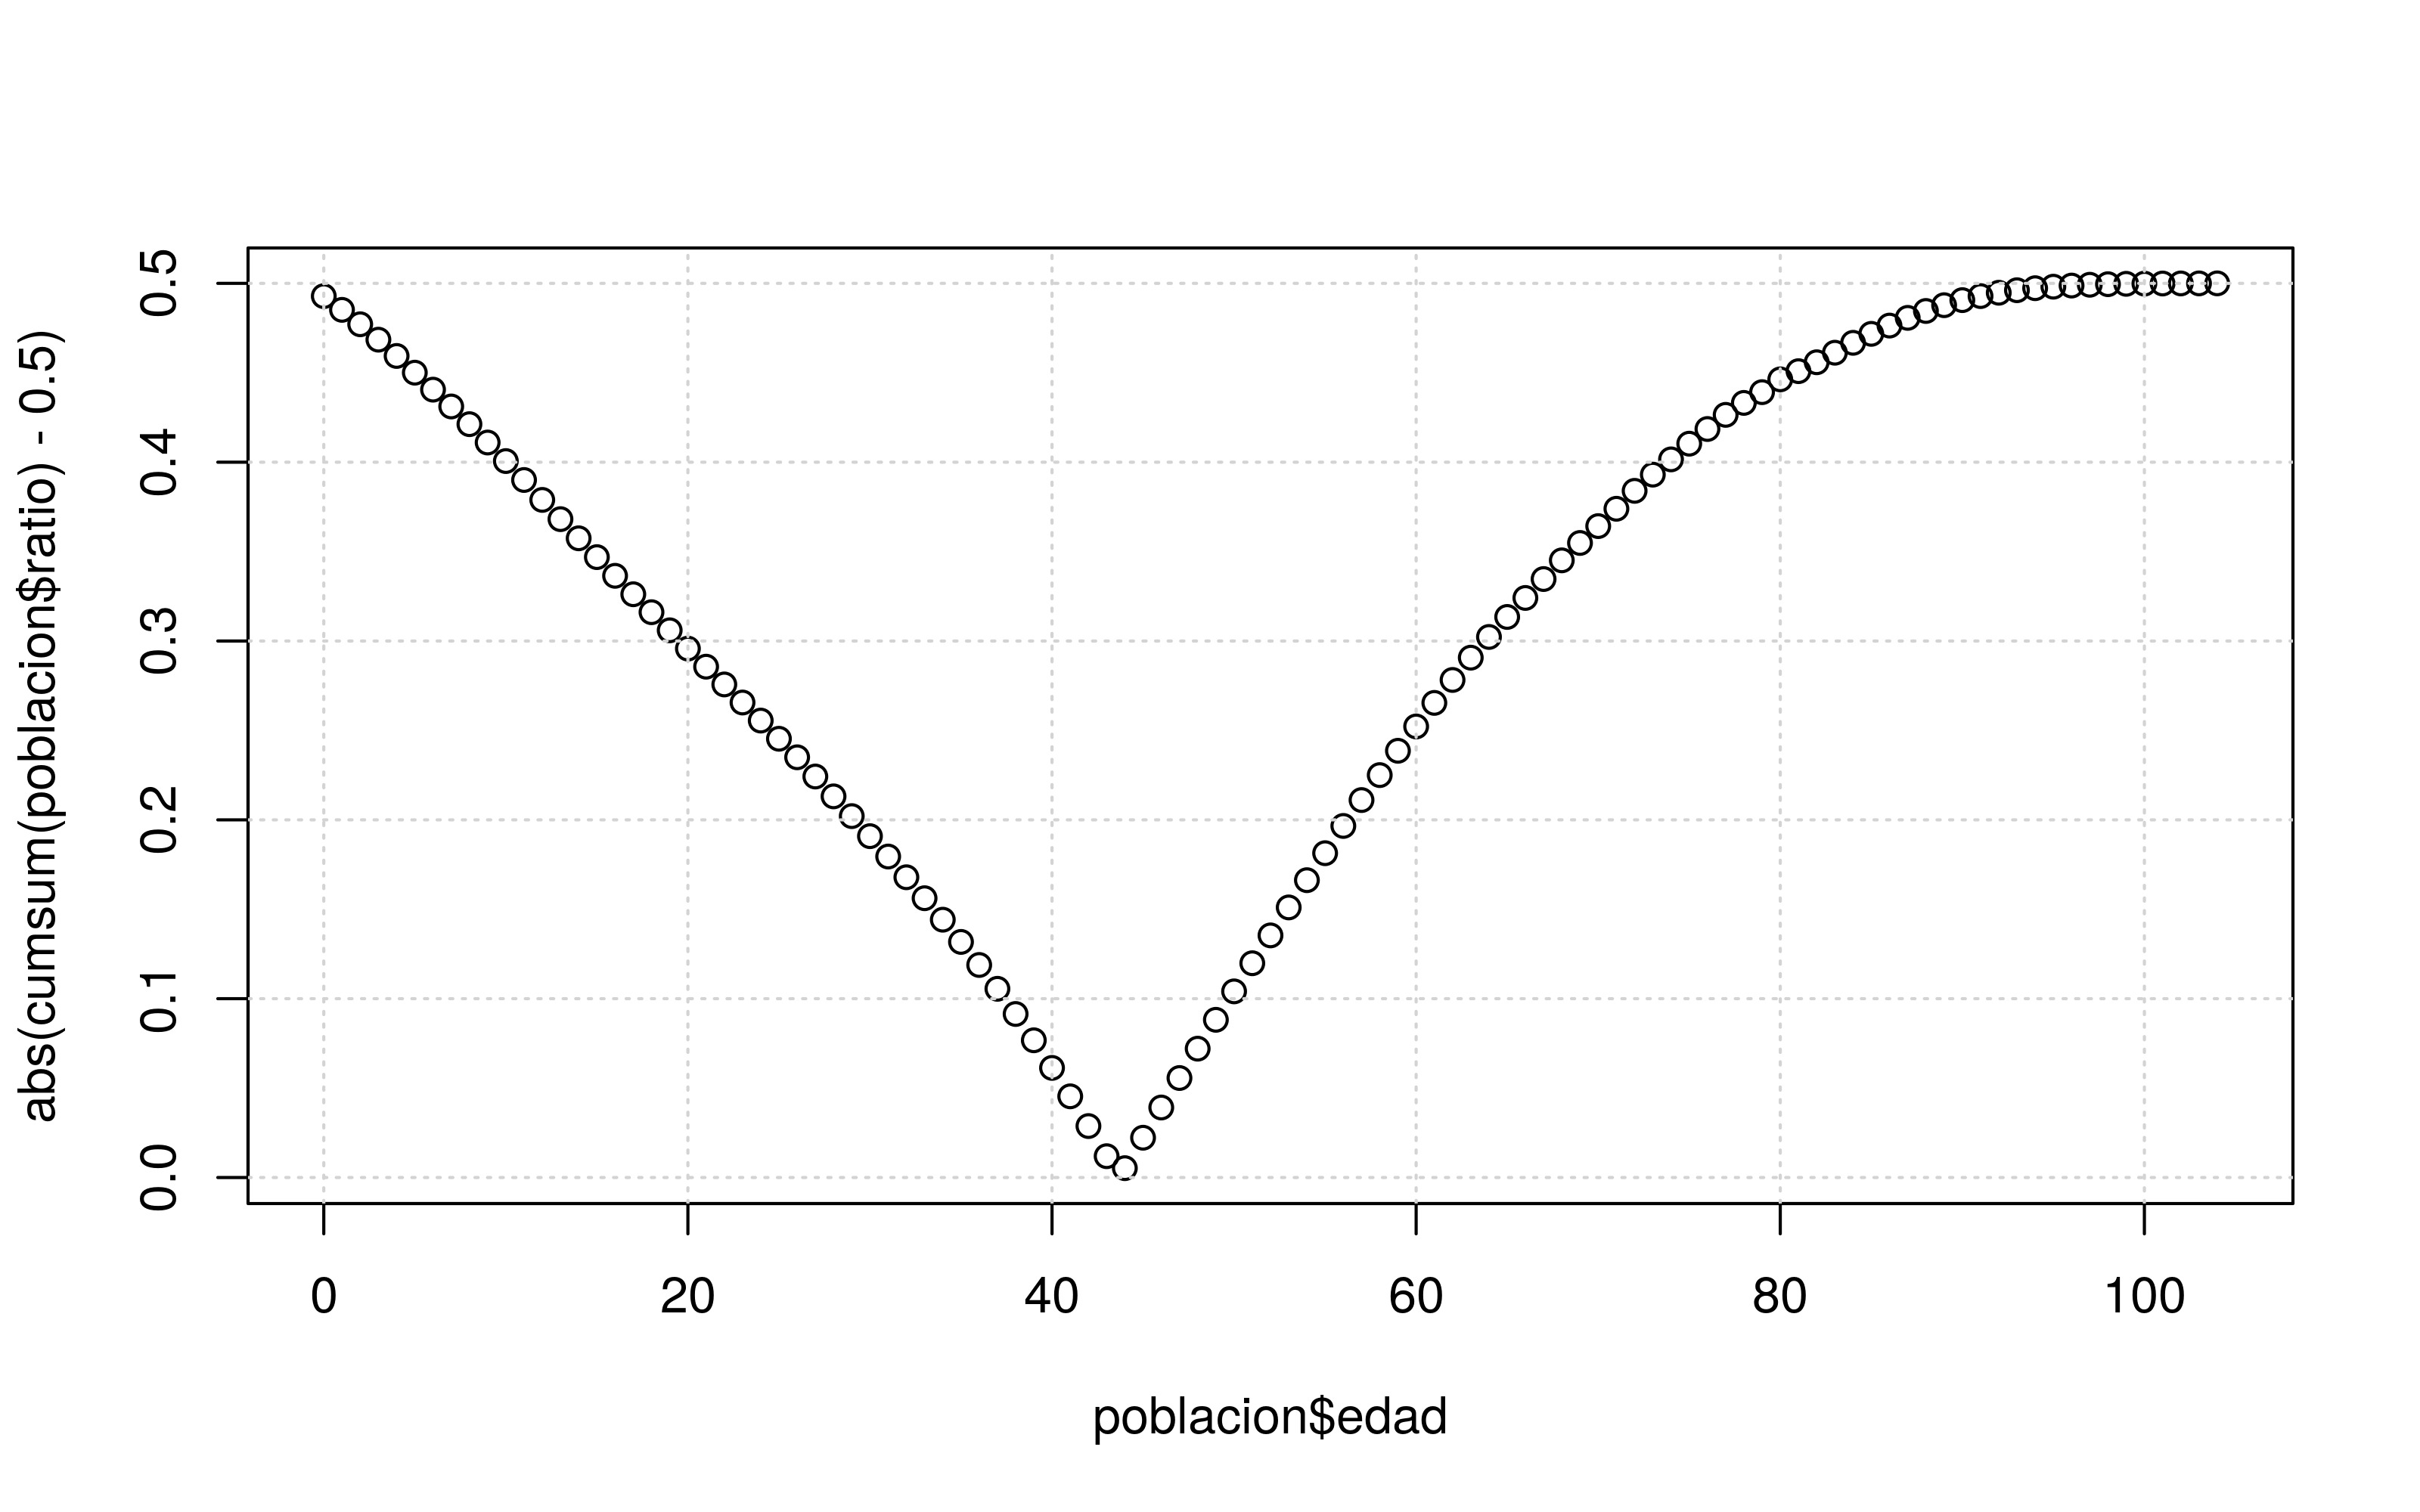

In [138]:
plot(poblacion$edad, abs(cumsum(poblacion$ratio)-0.5 ))
grid()

In [139]:
paste("La edad mediana es",poblacion$edad[which.min(abs(cumsum(poblacion$ratio) - 0.5))])

[1] "La edad mediana es 44"

Ayuda, función de la media:
\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [144]:
paste(" La media es",
sum(poblacion$edad*poblacion$`Ambos sexos`)/sum(poblacion$`Ambos sexos`))

[1] " La media es 43.3059455894582"

In [156]:
sum(poblacion$ratio[poblacion$edad>=67])

[1] 0.1759115